# Alyssa

### Milestone 4

In [ ]:
#import 
import pandas as pd
import seaborn as sns
#creating dataFrame


### Research question
**What is the relationship between the active participation of music in one's lifestyle (composing, playing an instrument, listening to music on a greater than average amount, or neither) in relation to the severity of mental health disorders among these individuals? How do these factors influence how they percieve the effect of music?**

**Analysis plan:** <br>

To Do:
- [x] clean data -> check for any missing values and if there are any incorrect data that is beyond the range of interest
- [x] Columns: instrumentalist, composer, hours per day, anxiety, depression, OCD, and insomnia, music effect
- [x] Sort the instrumentalist and composer columns into one column: type of music participation
    - with the categories: instrumentalist, composer, both, neither
- [x] Creating a new column to determine whether an individual listens to music on a greater than average or lower than average amount, based on the mean provided in this data
- [x] add an overall mental health analysis in the form of a percentage
- [x] setting anxiety and depression to be 35% each and insomnia to be 20%, and OCD to be 10%



Creating the dataframe 

In [ ]:
dataset=pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
dataset=dataset.dropna().reset_index(drop=True)

Subsetting the proper columns

In [ ]:
dataset=dataset[['Instrumentalist', 'Composer', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']]


First, the hours per day must be edited into data based on a percentage of how much they listen to music compared to the average. To do this, the apply function is used to standardize the data. We previously found in Milestone 3 that the average number of hours people listen to music is 3.57 and that some people said they listened to music 24 hours a day.

In [ ]:
dataset['Hours per day'].max()


18.0

In [ ]:
# given that it is basically impossible to listen to music more than 20 hours a day, I will remove these datapoints
dataset[dataset['Hours per day']>=20].index.values

array([], dtype=int64)

In [ ]:
dataset=dataset.drop([13,307,579]).reset_index(drop=True)
dataset

,Instrumentalist,Composer,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects
0,No,No,4.0,7.0,7.0,10.0,2.0,No effect
1,No,Yes,2.5,9.0,7.0,3.0,3.0,Improve
2,No,No,4.0,7.0,2.0,5.0,9.0,Improve
3,Yes,Yes,5.0,8.0,8.0,7.0,7.0,Improve
4,Yes,No,3.0,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...
605,Yes,No,2.0,7.0,6.0,0.0,9.0,Improve
606,Yes,No,1.0,3.0,2.0,2.0,5.0,Improve
607,No,Yes,6.0,2.0,2.0,2.0,2.0,Improve
608,Yes,No,5.0,2.0,3.0,2.0,1.0,Improve


In [ ]:
dataset['Hours per day (%)'] = dataset['Hours per day'].apply(lambda x: ((x-dataset['Hours per day'].mean())/(dataset['Hours per day'].std())+1)/2*100)
dataset

,Instrumentalist,Composer,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects,Hours per day (%)
0,No,No,4.0,7.0,7.0,10.0,2.0,No effect,57.199241
1,No,Yes,2.5,9.0,7.0,3.0,3.0,Improve,29.786400
2,No,No,4.0,7.0,2.0,5.0,9.0,Improve,57.199241
3,Yes,Yes,5.0,8.0,8.0,7.0,7.0,Improve,75.474468
4,Yes,No,3.0,4.0,8.0,6.0,0.0,Improve,38.924014
...,...,...,...,...,...,...,...,...,...
605,Yes,No,2.0,7.0,6.0,0.0,9.0,Improve,20.648787
606,Yes,No,1.0,3.0,2.0,2.0,5.0,Improve,2.373559
607,No,Yes,6.0,2.0,2.0,2.0,2.0,Improve,93.749696
608,Yes,No,5.0,2.0,3.0,2.0,1.0,Improve,75.474468


In [ ]:
def type_of_music(x):
    '''
    Decides what type of music the responder participated in. If they were a composer, instrumentalist, both, or neither
    '''
    if (x['Instrumentalist']=="Yes") & (x['Composer']=="Yes"):
        return "Both"
    elif x['Instrumentalist']=="Yes": 
        return "Instrumentalist"  
    elif x['Composer']=="Yes":
        return "Composer"
    else:
        return "Neither"

In [ ]:
dataset['Music Participation']= dataset.apply(type_of_music, axis="columns")
dataset

,Instrumentalist,Composer,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects,Hours per day (%),Music Participation
0,No,No,4.0,7.0,7.0,10.0,2.0,No effect,57.199241,Neither
1,No,Yes,2.5,9.0,7.0,3.0,3.0,Improve,29.786400,Composer
2,No,No,4.0,7.0,2.0,5.0,9.0,Improve,57.199241,Neither
3,Yes,Yes,5.0,8.0,8.0,7.0,7.0,Improve,75.474468,Both
4,Yes,No,3.0,4.0,8.0,6.0,0.0,Improve,38.924014,Instrumentalist
...,...,...,...,...,...,...,...,...,...,...
605,Yes,No,2.0,7.0,6.0,0.0,9.0,Improve,20.648787,Instrumentalist
606,Yes,No,1.0,3.0,2.0,2.0,5.0,Improve,2.373559,Instrumentalist
607,No,Yes,6.0,2.0,2.0,2.0,2.0,Improve,93.749696,Composer
608,Yes,No,5.0,2.0,3.0,2.0,1.0,Improve,75.474468,Instrumentalist


Creating an overall mental health column based on anxiety being 35%, depression being 35%, insomnia being 20% and OCD being 10%

In [ ]:
dataset['Overall Mental Health']=dataset['Anxiety']*.35+dataset['Depression']*.35+dataset['Insomnia']*.2+dataset['OCD']*.1
dataset

,Instrumentalist,Composer,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects,Hours per day (%),Music Participation,Overall Mental Health
0,No,No,4.0,7.0,7.0,10.0,2.0,No effect,57.199241,Neither,7.10
1,No,Yes,2.5,9.0,7.0,3.0,3.0,Improve,29.786400,Composer,6.50
2,No,No,4.0,7.0,2.0,5.0,9.0,Improve,57.199241,Neither,5.05
3,Yes,Yes,5.0,8.0,8.0,7.0,7.0,Improve,75.474468,Both,7.70
4,Yes,No,3.0,4.0,8.0,6.0,0.0,Improve,38.924014,Instrumentalist,5.40
...,...,...,...,...,...,...,...,...,...,...,...
605,Yes,No,2.0,7.0,6.0,0.0,9.0,Improve,20.648787,Instrumentalist,5.45
606,Yes,No,1.0,3.0,2.0,2.0,5.0,Improve,2.373559,Instrumentalist,2.65
607,No,Yes,6.0,2.0,2.0,2.0,2.0,Improve,93.749696,Composer,2.00
608,Yes,No,5.0,2.0,3.0,2.0,1.0,Improve,75.474468,Instrumentalist,2.25


### Method Chaining

Doing the same thing as the previous except using method chaining

In [ ]:
imean=dataset['Hours per day'].mean()
istd=dataset['Hours per day'].std()
istd

2.730156903404203

In [ ]:
def standardization(x):
    '''
    returning the standardized value of Hours per day based on the maximum value, standard deviation, and the mean of the dataset
    '''
    return ((x['Hours per day']-imean)/(istd)+1)/8.470962736230923*100


In [ ]:
chaindf=(
    pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
    .dropna()
    .assign(
	Overall_mental_health=lambda x: x['Anxiety']*.35+x['Depression']*.35+x['Insomnia']*.2+x['OCD']*.1)
    .assign(
        Music_Participation=lambda x: x.apply(type_of_music, axis="columns"))
    .reset_index(drop=True)
    .assign(
        Hours_per_day_Percentage=lambda x: x.apply(standardization,axis="columns")
    )
    .loc[:, ["Instrumentalist", "Composer", "Hours_per_day_Percentage", "Anxiety", "Depression","Insomnia","OCD", "Music effects","Music_Participation","Overall_mental_health"]]
)
chaindf

,Instrumentalist,Composer,Hours_per_day_Percentage,Anxiety,Depression,Insomnia,OCD,Music effects,Music_Participation,Overall_mental_health
0,No,No,13.521207,7.0,7.0,10.0,2.0,No effect,Neither,7.10
1,No,Yes,7.035298,9.0,7.0,3.0,3.0,Improve,Composer,6.50
2,No,No,13.521207,7.0,2.0,5.0,9.0,Improve,Neither,5.05
3,Yes,Yes,17.845147,8.0,8.0,7.0,7.0,Improve,Both,7.70
4,Yes,No,9.197268,4.0,8.0,6.0,0.0,Improve,Instrumentalist,5.40
...,...,...,...,...,...,...,...,...,...,...
611,Yes,No,4.873328,7.0,6.0,0.0,9.0,Improve,Instrumentalist,5.45
612,Yes,No,0.549388,3.0,2.0,2.0,5.0,Improve,Instrumentalist,2.65
613,No,Yes,22.169087,2.0,2.0,2.0,2.0,Improve,Composer,2.00
614,Yes,No,17.845147,2.0,3.0,2.0,1.0,Improve,Instrumentalist,2.25


In [ ]:
chaindf["Hours_per_day_Percentage"].max()

100.0

Also, for the sake of summarizing the varying number of activities that people participate in music and comparing it to the average of the overall mental health of the categories


In [ ]:
chaindf.groupby("Music_Participation").mean()

C:\Users\alkon\AppData\Local\Temp\ipykernel_8388\1788567879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chaindf.groupby("Music_Participation").mean()


,Hours_per_day_Percentage,Anxiety,Depression,Insomnia,OCD,Overall_mental_health
Music_Participation,,,,,,
Both,16.334373,6.144578,5.518072,4.578313,3.000000,5.297590
Composer,17.412753,5.320000,5.080000,4.160000,2.200000,4.692000
Instrumentalist,8.652156,6.000000,4.448718,3.679487,2.653846,4.658333
Neither,12.105145,5.829923,4.883632,3.649616,2.617647,4.741432


In [ ]:
#wrapping it in a function
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .reset_index(drop=True)
)

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
        .assign(
            Overall_mental_health=lambda x: x['Anxiety']*.35+x['Depression']*.35+x['Insomnia']*.2+x['OCD']*.1)
        .assign(
            Music_Participation=lambda x: x.apply(type_of_music, axis="columns"))
        .reset_index(drop=True)
        .assign(
            Hours_per_day_Percentage=lambda x: x.apply(standardization,axis="columns")
        )
        .loc[:, ["Instrumentalist", "Composer", "Hours_per_day_Percentage", "Anxiety", "Depression","Insomnia","OCD", "Music effects","Music_Participation","Overall_mental_health"]]


      )

    # Make sure to return the latest dataframe

    return df2 

df=load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
df

,Instrumentalist,Composer,Hours_per_day_Percentage,Anxiety,Depression,Insomnia,OCD,Music effects,Music_Participation,Overall_mental_health
0,No,No,13.521207,7.0,7.0,10.0,2.0,No effect,Neither,7.10
1,No,Yes,7.035298,9.0,7.0,3.0,3.0,Improve,Composer,6.50
2,No,No,13.521207,7.0,2.0,5.0,9.0,Improve,Neither,5.05
3,Yes,Yes,17.845147,8.0,8.0,7.0,7.0,Improve,Both,7.70
4,Yes,No,9.197268,4.0,8.0,6.0,0.0,Improve,Instrumentalist,5.40
...,...,...,...,...,...,...,...,...,...,...
611,Yes,No,4.873328,7.0,6.0,0.0,9.0,Improve,Instrumentalist,5.45
612,Yes,No,0.549388,3.0,2.0,2.0,5.0,Improve,Instrumentalist,2.65
613,No,Yes,22.169087,2.0,2.0,2.0,2.0,Improve,Composer,2.00
614,Yes,No,17.845147,2.0,3.0,2.0,1.0,Improve,Instrumentalist,2.25


Visualizing the question through various dataset. The higher the overall mental health indicates more severe outcomes.

<seaborn.axisgrid.FacetGrid>

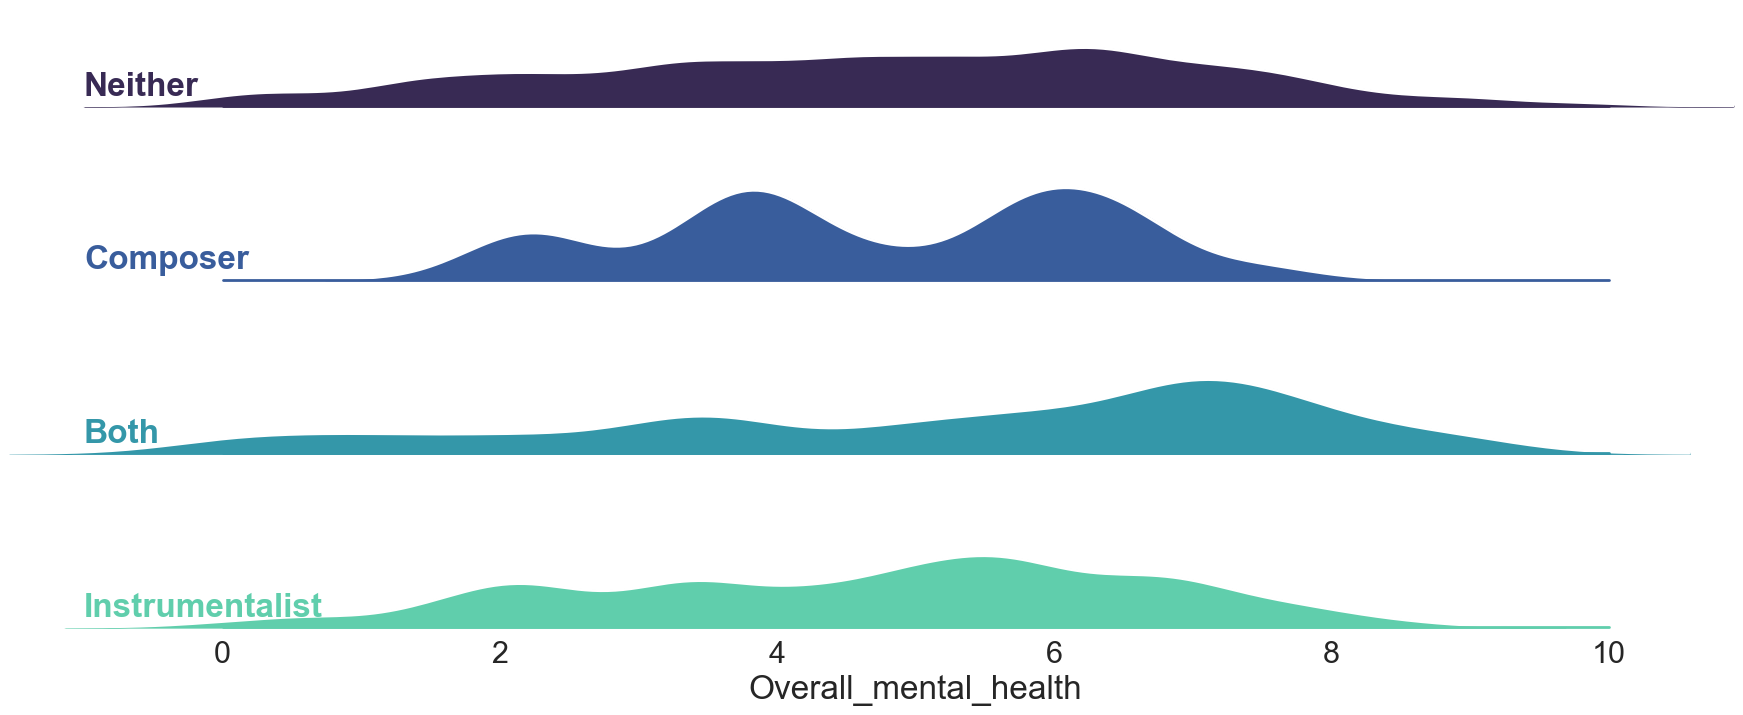

In [ ]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=2
)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Music_Participation", hue="Music_Participation", aspect=8, height=2, palette="mako")

# Draw the densities 
g.map(sns.kdeplot, "Overall_mental_health",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Overall_mental_health", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Overall_mental_health")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.8)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(0, 10))


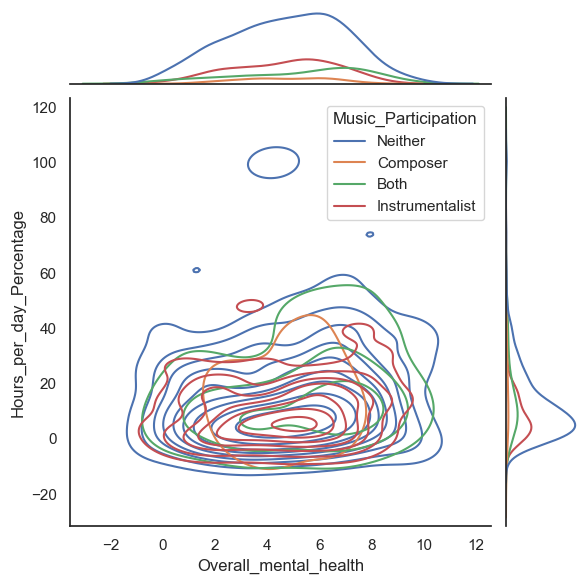

In [ ]:
# Seeing the music effects for composers -- determining the distribution of improvement, no effect, or worsening effect among composers vs noncomposers
g = sns.jointplot(
    data=chaindf,
    x="Overall_mental_health", y="Hours_per_day_Percentage", hue="Music_Participation",
    kind="kde",
)

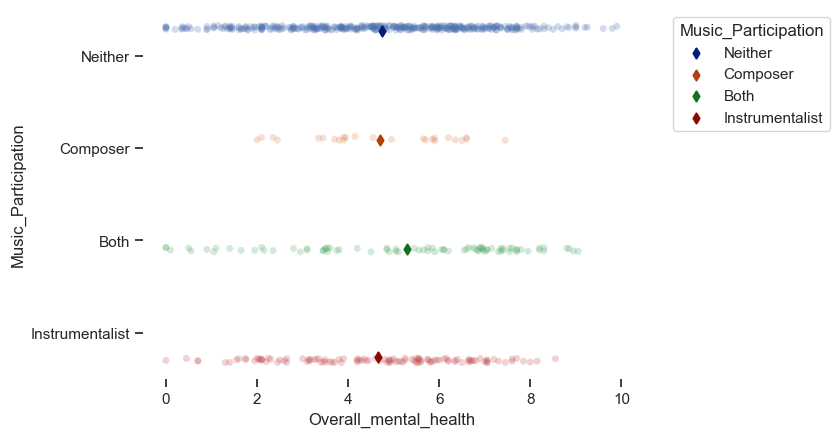

In [ ]:

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df, x="Overall_mental_health", y="Music_Participation", hue="Music_Participation",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=df, x="Overall_mental_health", y="Music_Participation", hue="Music_Participation",
    join=False, dodge=.8 - .8/ 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="upper right", bbox_to_anchor=(1.4, 1) 
)


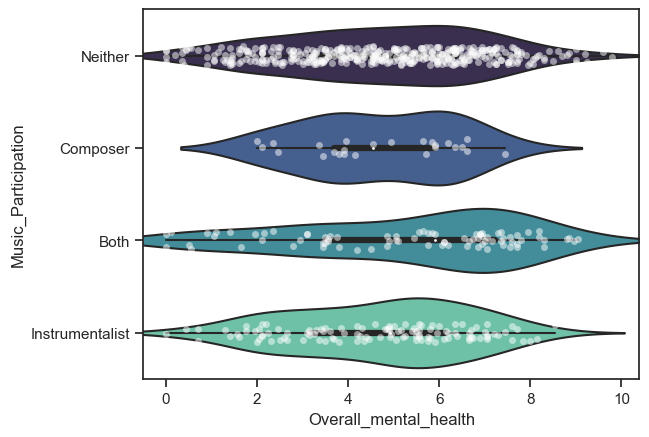

<Figure size 640x480 with 0 Axes>

In [ ]:

# Draw a violinplot and striplot
sns.violinplot(data=df, x="Overall_mental_health", y="Music_Participation", palette="mako")
sns.stripplot(data=df, x='Overall_mental_health', y='Music_Participation', color='white', alpha=0.5)
plt.show()

# Finalize the figure
ax.set(ylim=(-1, 1.05))
ax.set(xlim=(-1, 11))
sns.despine(left=True, bottom=True)

To be honest, all of these visualizations demonstrate that there really isn't any correlation with music participation and overall mental health. I can check for hours per day against overall mental health if there is any other form of correlation though - I will check with both the percentage calculation and the non-processed hours per day data.

<seaborn.axisgrid.JointGrid>

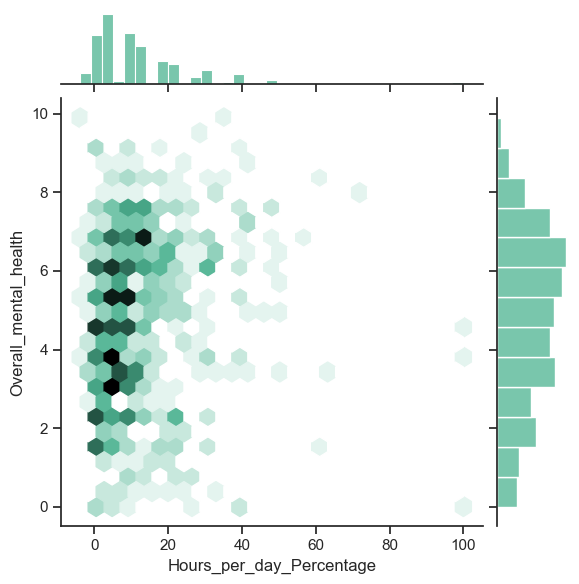

In [ ]:
sns.jointplot(data=df, x="Hours_per_day_Percentage", y="Overall_mental_health", kind="hex", color="#4CB391")

<seaborn.axisgrid.JointGrid>

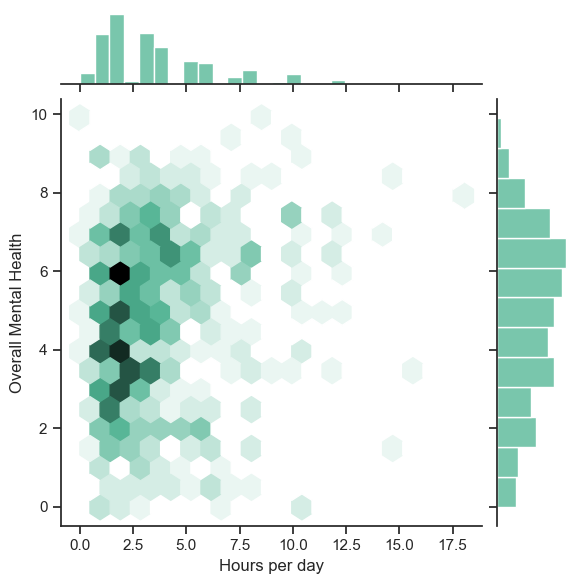

In [ ]:

sns.jointplot(data=dataset, x="Hours per day", y="Overall Mental Health", kind="hex", color="#4CB391")


There doesn't seem to be much of a positive correlation with the hours per day either. I will check whether music participation can influence the percieved effect of music however. 

In [ ]:
dfnew=df[['Music_Participation', 'Music effects']]
dfnew=pd.DataFrame(dfnew.groupby(['Music effects','Music_Participation'])['Music_Participation'].count())
dfnew

Music_Participation
Music effects Music_Participation                     
Improve       Both                                  67
              Composer                              23
              Instrumentalist                       96
              Neither                              279
No effect     Both                                  14
              Composer                               2
              Instrumentalist                       19
              Neither                              101
Worsen        Both                                   2
              Instrumentalist                        2
              Neither                               11

In [ ]:
df2=df.groupby(['Music effects','Music_Participation']).size().unstack('Music_Participation', fill_value=0)
df2

Music_Participation,Both,Composer,Instrumentalist,Neither
Music effects,,,,
Improve,67,23,96,279
No effect,14,2,19,101
Worsen,2,0,2,11


Since there are different amounts, I will probably have to convert the frequencies into percentages out of a whole

In [ ]:
list(df2.columns)


['Both', 'Composer', 'Instrumentalist', 'Neither']

In [ ]:
df3=(df2
    .assign(
        Both_P=lambda x: x['Both']/x['Both'].sum()*100)
    .assign(
        Composer_P=lambda x: x['Composer']/x['Composer'].sum()*100)
    .assign(
        Instrumentalist_P=lambda x: x['Instrumentalist']/x['Instrumentalist'].sum()*100)
     .assign(
        Neither_P=lambda x: x['Neither']/x['Neither'].sum()*100)
    .loc[:, ['Both_P','Composer_P','Instrumentalist_P','Neither_P']]
)
df3
df4= df3.transpose()
df4

Music effects,Improve,No effect,Worsen
Music_Participation,,,
Both_P,80.722892,16.867470,2.409639
Composer_P,92.000000,8.000000,0.000000
Instrumentalist_P,82.051282,16.239316,1.709402
Neither_P,71.355499,25.831202,2.813299


<AxesSubplot:xlabel='Music effects', ylabel='Music_Participation'>

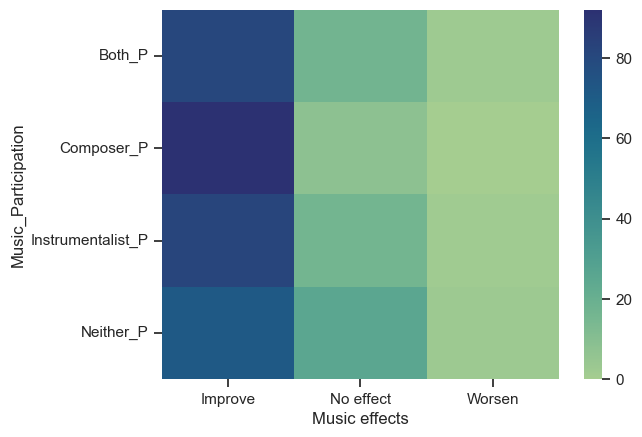

In [ ]:
sns.heatmap(data=df4, cmap="crest")

### Research Questions for Milestone 3

**What is the relationship between the active participation of music in one's lifestyle (composing, playing an instrument, listening to music on a greater than average amount, or neither) in relation to the severity of mental health disorders among these individuals?**

**Analysis plan:**
For my analysis, I plan on using the columns instrumentalist, composer, hours per day, anxiety, depression, OCD, and insomnia. I plan on sorting the instrumentalist and composer columns into one column: type of music participation, with the categories: instrumentalist, composer, both, neither. I also plan on creating a new column to determine whether an individual listens to music on a greater than average or lower than average amount, based on the mean provided in this data. I will then analyze the means of different anxiety disorders against each of these new columns with categories and visualize the data using a barplot or boxplot. I will clean my data by checking for any missing values and if there are any incorrect data that is beyond the range of interest. If there are any outliers, I will indicate as such and deal with these appropriately. I will also add an overall mental health analysis in the form of a percentage by doing some further data manipulation, by setting anxiety and depression to be 35% each and insomnia to be 20%, and OCD to be 10%. Finally, I will visualize said data in the most appropriate manner after a few different experimentations. I may view the frequency of hours of music listened per day and a scatterplot heatmap of each of the different disorder categories.

<br>

**What is the correlation between an instrument player, a composer, neither, or frequency of music listened per day and how they percieve the effect of music on their lives?**

 <br>**Analysis plan:**
Similar to before, I will most likely use the same dataframe with the newly created columns to analyze this data, with an extra column to include the music effects. I will have to remove any of the NaN values of music effects and check any of the other columns for incorrect or missing data. I will also plan on dealing with any outliers and noting this as well. After this processing, I will find a suitable method for visualizing the data. I will most likely use a similar method of barplots to determine the percentage distribution of percieved mental health effects against the different categories.




### Milestone 2: Research question/interests

**What is the relationship between the active participation of music in one's lifestyle (composing, playing an instrument, or neither) in relation to the frequency of anxiety and depression among these individuals?**
 
I plan on answering my first research question using the columns: instrumentalist, composer, anxiety and depression. I may visualize this data using a scatterplot based on categories of composing, playing an instrument or neither in relation to anxiety or depression and the scale of anxiety or depression on the y axis.  <br><br>

**Analysis plan:**
For my analysis, I will incorporate the columns: instrumentalist, composer, neither, anxiety, and depression into a data frame. I will clean my data by checking for any missing values and if there are any incorrect data that is beyond the range of interest. If there are any outliers, I will indicate as such and deal with these appropriately. I plan on adding an additional column "neither" to count the number of those who are not composing or playing an instrument by doing groupBy. I may also add an overall mental health analysis in the form of a percentage by doing some further data manipulation. Finally, I will visualize said data in the most appropriate manner after a few different experimentations.

<br>

**What is the correlation between an instrument player, a composer, or neither and how they percieve the effect of music on their lives?**

For my second research question, I plan on using the columns: instrumentalist, composer, and music effects. <br><br>
**Analysis plan:**
I will incorporate the columns: instrumentalist, composer, and music effects into a data frame. Once again, I will create a new aggregate column of those who are neither an instrumentalist or a composer. I will have to remove any of the NaN values of music effects and check any of the other columns for incorrect or missing data. I will also plan on dealing with any outliers and noting this as well. I will count the total number of those who have felt that music has had an improvement and compare it between those who are a composer, instrumentalist or neither. After this processing, I will find a suitable method for visualizing the data.




## Milestone 3: EDA & Research Questions 

In [ ]:
#import 
import pandas as pd
import seaborn as sns
#creating dataFrame
dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')

dataset.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
# Determining all the names of the columns in the dataset

pd.DataFrame(dataset.columns)

,0
0,Timestamp
1,Age
2,Primary streaming service
3,Hours per day
4,While working
5,Instrumentalist
6,Composer
7,Fav genre
8,Exploratory
9,Foreign languages


In [ ]:
# Figuring out the total rows and columns of the dataset (rows, columns)

dataset.shape

(736, 33)

In [ ]:
# Since I am more interested in the columns: instrumentalist, composer, anxiety, depression, insomnia, OCD, and music effects, I'm going to produce a new dataframe with these columns

In [ ]:
df=dataset[['Instrumentalist', 'Composer', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']]
df

,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
0,Yes,Yes,3.0,0.0,1.0,0.0,NaN
1,No,No,7.0,2.0,2.0,1.0,NaN
2,No,No,7.0,7.0,10.0,2.0,No effect
3,No,Yes,9.0,7.0,3.0,3.0,Improve
4,No,No,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...
731,Yes,No,7.0,6.0,0.0,9.0,Improve
732,Yes,No,3.0,2.0,2.0,5.0,Improve
733,No,Yes,2.0,2.0,2.0,2.0,Improve
734,Yes,No,2.0,3.0,2.0,1.0,Improve


In [ ]:
# Looking at the possible values of music effects

df['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
#looking at how many NaN values are in column 'Music effects'

df['Music effects'].isna().sum()

8

In [ ]:
# Dropping rows that have NaN values to ensure that this does not interfere with the results
df=df.dropna()

In [ ]:
# Examining how many instrumentalists are in this dataset

(df['Instrumentalist']=='Yes').sum()

232

In [ ]:
# Examining how many composers are in this dataset
(df['Composer']=='Yes').sum()

124

In [ ]:
# Looking at the possible values of Instrumentalist

df['Instrumentalist'].unique()


array(['No', 'Yes'], dtype=object)

In [ ]:
# Looking at the possible values of composer

df['Composer'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

# Looking at the highest and lowest values of Anxiety, depression, insomnia, OCD

pd.DataFrame([{"Anxiety":df['Anxiety'].min(),  "Depression":df['Depression'].min(),  "Insomnia":df['Insomnia'].min(), "OCD":df['OCD'].min()},{ "Anxiety":df['Anxiety'].max(), "Depression":df['Depression'].max(),  "Insomnia":df['Insomnia'].max(),  "OCD":df['OCD'].max()}])



,Anxiety,Depression,Insomnia,OCD
0,0.0,0.0,0.0,0.0
1,10.0,10.0,10.0,10.0


In [ ]:
#examining the means, counts and other values of the numeric categories
df.describe()

,Anxiety,Depression,Insomnia,OCD
count,725.000000,725.000000,725.000000,725.000000
mean,5.848966,4.804138,3.745517,2.649655
std,2.789758,3.022861,3.095465,2.849230
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000


*Notes:* <br>
Cell 3: There are 32 different variables to work with in this dataset. 

Cell 5: There seems to be three categories for music effects - no effect, improve, worsen.

Cell 7 & 8: There are 232 instrumentalists and 124 composers from a dataset of 735 responses.

Describe table: The average anxiety experience of 5.848 is higher than any other category of metnal health, this also has the least amount of standard deviation. The lowest experience of mental health seems to be OCD with a mean of 2.650. Depression is the second most frequent and insomnia is the third, and they both have a similar standard deviation. 

<seaborn.axisgrid.FacetGrid>

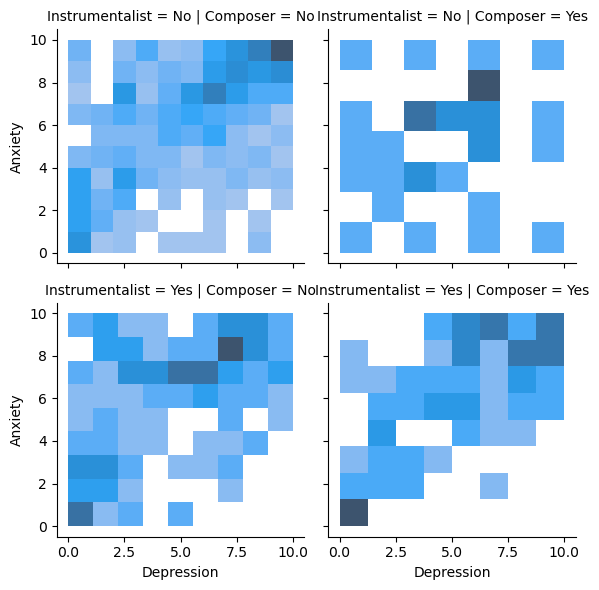

In [ ]:
# visualizing scatterplot of composers and instrumentalists related to their anxiety and depression, 0 being none and 10 being extreme
g= sns.FacetGrid(df, col="Composer", row="Instrumentalist")
g.map(sns.histplot, "Depression", "Anxiety")


*Notes:* <br>
From this data visualization, there seems to be the greatest amount of anxiety and depression among those who are neither composers or instrumentalists and there are the least amount of anxiety and depression among those who are both instrumentalists and composers. Despite this, the data is fairly distributed so it is extremely difficult to determnine whether this relationship is significant and more data visualizations will have to be done to get a better visualization. There also seems to be the issue of lack of data for the composer category.

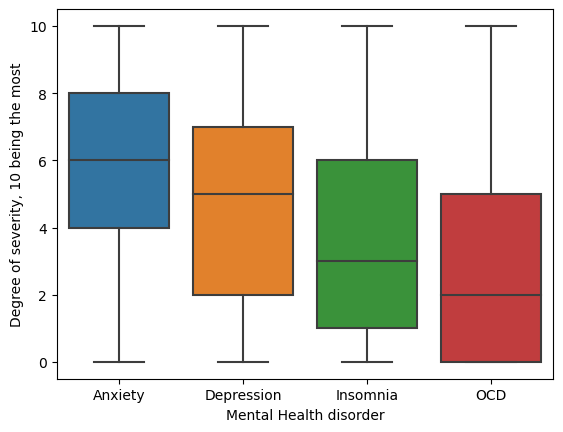

In [ ]:
# visualizing the distribution of different mental health disorders
ax1=sns.boxplot(data=df).set(xlabel="Mental Health disorder",ylabel="Degree of severity, 10 being the most")



*Notes:* <br>
From this data visualization, you can see that anxeity was reported to be the most severe, whereas OCD was the lowest. In the order of anxiety, depression, insomnia, and OCD were the most to least severe. Anxiety also had the smallest standard deviation whereas the other categories were fairly similar.

(0.0, 100.0)

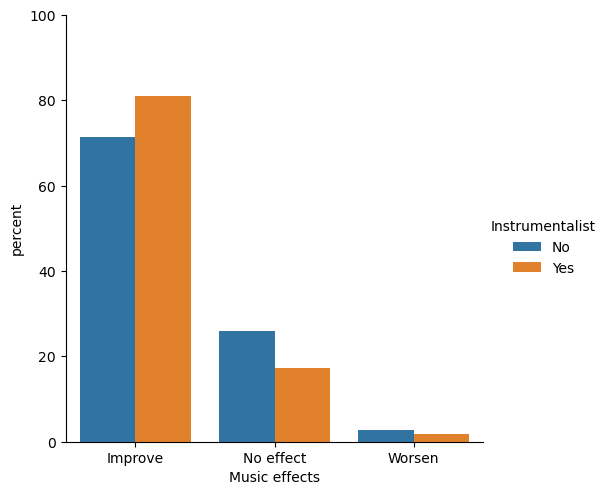

In [ ]:
# Seeing the music effects for instrumentalists -- determining the distribution of improvement, no effect, or worsening effect among instrumentalists vs noninstrumentalists
df1 = df.groupby('Instrumentalist')['Music effects'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x='Music effects',y='percent',hue='Instrumentalist',kind='bar',data=df1)
g.ax.set_ylim(0,100)

(0.0, 100.0)

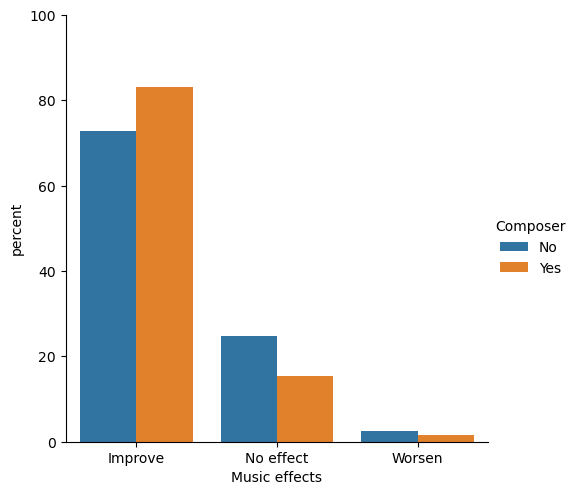

In [ ]:
# Seeing the music effects for composers -- determining the distribution of improvement, no effect, or worsening effect among composers vs noncomposers
df1 = df.groupby('Composer')['Music effects'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x='Music effects',y='percent',hue='Composer',kind='bar',data=df1)
g.ax.set_ylim(0,100)


*Notes:* <br>
From either visualization, the distribution of music effects for composers and instrumentalists skewed more heavily towards positive effects compared to those who did not participate as actively in music. Despite this, a great amount of people who did not participate in either activity still felt as though music had a positive effect on their mental wellbeing. I wonder if this is because even if they did not actively participate in music, they still actively listened to it on a daily basis. As a result, I might pivot my research question to factor in the variable of time spent per day listening to music.

In [ ]:
#determining the distribution of music listened per day.

dataset['Hours per day'].describe()

count    736.000000
mean       3.572758
std        3.028199
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Hours per day'>

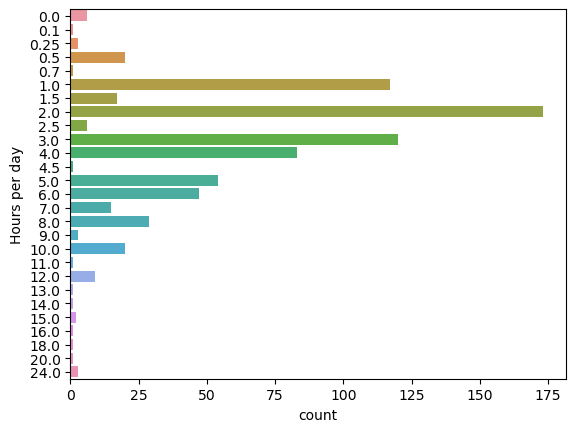

In [ ]:
# visualizing the distribution of music listened per day

sns.countplot(y=dataset["Hours per day"])